# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
count = 1
sets = 1 
index = 0
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humid_list = []
cloud_list = []
wind_list = []
country_list = []
date_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {count} of Set {sets} | {city}")
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response['coord']["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humid_list.append(response["main"]["humidity"])
        cloud_list.append(response["clouds"]["all"])
        wind_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
    except Exception:
        print("City not found. Skipping...")
    count += 1    
    if count == 51:
        count = 0
        sets = sets + 1
        time.sleep(60)
    
print("-----------------------------")    
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | lavrentiya
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | karachi
Processing Record 7 of Set 1 | kaliua
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | waingapu
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | xining
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | bandeirantes
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | burkhala
City not found. Skipping...
Processing Record 19 of Set 1 | acarau
Processing Record 20 of Set 1 | halmstad
Processing Record 21 of Set 1 | san quintin

Processing Record 36 of Set 4 | brae
Processing Record 37 of Set 4 | inhapim
Processing Record 38 of Set 4 | gat
Processing Record 39 of Set 4 | oktyabrskiy
Processing Record 40 of Set 4 | quartz hill
Processing Record 41 of Set 4 | nyagan
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | la palma
Processing Record 44 of Set 4 | khasan
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | schweinfurt
Processing Record 47 of Set 4 | pospelikha
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | burica
City not found. Skipping...
Processing Record 50 of Set 4 | banda aceh
Processing Record 0 of Set 5 | ust-kulom
Processing Record 1 of Set 5 | luanda
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | formosa do rio preto
Processing Record 4 of Set 5 | union
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of Set 5 | sinjar
Processing Record 7 of Set 5 | pev

Processing Record 22 of Set 8 | ornskoldsvik
Processing Record 23 of Set 8 | swan river
Processing Record 24 of Set 8 | qazvin
Processing Record 25 of Set 8 | sao francisco de assis
Processing Record 26 of Set 8 | vostok
Processing Record 27 of Set 8 | bayir
Processing Record 28 of Set 8 | marrakesh
Processing Record 29 of Set 8 | morant bay
Processing Record 30 of Set 8 | auki
Processing Record 31 of Set 8 | homer
Processing Record 32 of Set 8 | boden
Processing Record 33 of Set 8 | lazaro cardenas
Processing Record 34 of Set 8 | abu dhabi
Processing Record 35 of Set 8 | melbourne
Processing Record 36 of Set 8 | lanxi
Processing Record 37 of Set 8 | marsh harbour
Processing Record 38 of Set 8 | pangai
Processing Record 39 of Set 8 | nelson bay
Processing Record 40 of Set 8 | portland
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | inhambane
Processing Record 43 of Set 8 | mandurah
Processing Record 44 of Set 8 | dalby
Processing Record 45 of Set 8 | ko samui
P

Processing Record 6 of Set 12 | oussouye
Processing Record 7 of Set 12 | sohbatpur
Processing Record 8 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 9 of Set 12 | najran
Processing Record 10 of Set 12 | rorvik
Processing Record 11 of Set 12 | batemans bay
Processing Record 12 of Set 12 | saint-joseph
Processing Record 13 of Set 12 | howard springs
Processing Record 14 of Set 12 | camingawan
Processing Record 15 of Set 12 | litovko
Processing Record 16 of Set 12 | general pico
Processing Record 17 of Set 12 | taitung
Processing Record 18 of Set 12 | imbituba
Processing Record 19 of Set 12 | tazovskiy
Processing Record 20 of Set 12 | chiang kham
Processing Record 21 of Set 12 | inverell
Processing Record 22 of Set 12 | havre-saint-pierre
Processing Record 23 of Set 12 | south venice
Processing Record 24 of Set 12 | epernay
Processing Record 25 of Set 12 | turochak
Processing Record 26 of Set 12 | kuopio
Processing Record 27 of Set 12 | weiser
Processing Record 28 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {"City": city_list, "Lat": lat_list, "Lng":lng_list, "Max Temp":max_temp_list, 
                "Humidity":humid_list, "Cloudiness":cloud_list, "Wind Speed":wind_list,
                "Country":country_list, "Date":date_list
               }
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       Cherskiy  68.7500  161.3000    -24.23        86         100   
1     Lavrentiya  65.5833 -171.0000      0.57        85         100   
2        Ushuaia -54.8000  -68.3000     64.40        32          40   
3  Mount Gambier -37.8333  140.7667     71.60        46          95   
4        Karachi  24.9056   67.0822     53.60        24           0   

   Wind Speed Country        Date  
0        7.36      RU  1611518356  
1        2.59      RU  1611518356  
2       28.77      AR  1611518356  
3        5.75      AU  1611518356  
4       11.50      PK  1611518356

In [6]:
## Export data into a csv
weather_df.to_csv("output_data/cities.csv")

In [7]:
weather_df.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  564.000000  564.000000  564.000000  564.000000  564.000000  564.000000   
mean    20.140707   14.856853   49.842394   73.429078   56.352837    7.976933   
std     33.328458   90.402038   33.710545   20.234687   40.048966    5.711691   
min    -54.800000 -179.166700  -59.800000   11.000000    0.000000    0.180000   
25%     -7.112500  -65.029075   30.990000   64.000000   10.000000    3.440000   
50%     24.686150   20.345800   61.000000   78.000000   75.000000    6.910000   
75%     48.698550   94.705350   77.362500   89.000000   97.000000   11.270000   
max     78.218600  179.316700  105.870000  100.000000  100.000000   33.380000   

               Date  
count  5.640000e+02  
mean   1.611519e+09  
std    3.706347e+02  
min    1.611518e+09  
25%    1.611518e+09  
50%    1.611519e+09  
75%    1.611519e+09  
max    1.611520e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
## Starter code did a .describe() again here for some reason
## weather_df.describe() ??

In [65]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []

In [9]:
clean_city_data = weather_df[weather_df["Humidity"] <= 100]

In [10]:
clean_city_data.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       Cherskiy  68.7500  161.3000    -24.23        86         100   
1     Lavrentiya  65.5833 -171.0000      0.57        85         100   
2        Ushuaia -54.8000  -68.3000     64.40        32          40   
3  Mount Gambier -37.8333  140.7667     71.60        46          95   
4        Karachi  24.9056   67.0822     53.60        24           0   

   Wind Speed Country        Date  
0        7.36      RU  1611518356  
1        2.59      RU  1611518356  
2       28.77      AR  1611518356  
3        5.75      AU  1611518356  
4       11.50      PK  1611518356

In [66]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
today = date.today()
today_date = today.strftime("%m/%d/%Y")
today_date

'01/24/2021'

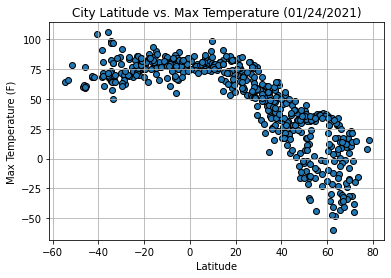

In [70]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.grid()
plt.savefig("output_data/lat_temp.png")
plt.show()

## Is this the date of the data or our date today 
## Give outline to the points to better visualize -- do for all plots 

In [67]:
# date = clean_city_data["Date"][0]
# datetime.datetime(date)

## trying to convert unix to normal date via from datetime import datetime 

## Latitude vs. Humidity Plot

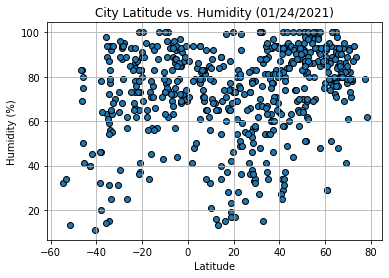

In [71]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.grid()
plt.savefig("output_data/lat_hum.png")
plt.show()
## Need to add date to chart title -- currently in Unix, need to convert
## Is this the date of the data or our date today 

## Latitude vs. Cloudiness Plot

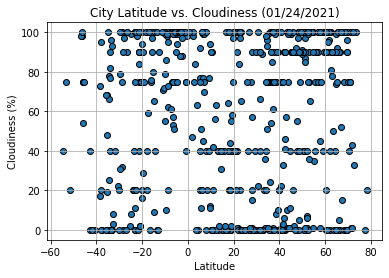

In [72]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.grid()
plt.savefig("output_data/lat_cloud.png")
plt.show()
## Need to add date to chart title -- currently in Unix, need to convert
## Is this the date of the data or our date today 

## Latitude vs. Wind Speed Plot

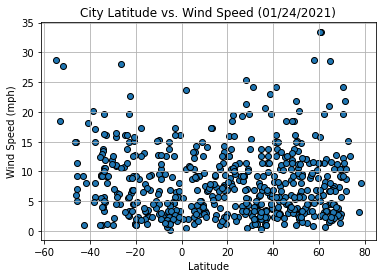

In [73]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.grid()
plt.savefig("output_data/lat_wind.png")
plt.show()
## Need to add date to chart title -- currently in Unix, need to convert
## Is this the date of the data or our date today 

## Linear Regression

In [17]:
northern_hem_data = clean_city_data[clean_city_data["Lat"] > 0]
northern_hem_data.head()

## Do we want to be inclusive of the equator?

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        Cherskiy  68.7500  161.3000    -24.23        86         100   
1      Lavrentiya  65.5833 -171.0000      0.57        85         100   
4         Karachi  24.9056   67.0822     53.60        24           0   
6  Cabo San Lucas  22.8909 -109.9124     73.00        49          20   
7          Albany  42.6001  -73.9662     24.01        37          46   

   Wind Speed Country        Date  
0        7.36      RU  1611518356  
1        2.59      RU  1611518356  
4       11.50      PK  1611518356  
6       10.36      MX  1611518343  
7        5.01      US  1611518281

In [18]:
southern_hem_data = clean_city_data[clean_city_data["Lat"] < 0]
southern_hem_data.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
2        Ushuaia -54.8000  -68.3000     64.40        32          40   
3  Mount Gambier -37.8333  140.7667     71.60        46          95   
5         Kaliua  -5.0606   31.7936     65.98        92          99   
8        Mataura -46.1927  168.8643     60.01        83          98   
9       Waingapu  -9.6567  120.2641     78.01        77          86   

   Wind Speed Country        Date  
2       28.77      AR  1611518356  
3        5.75      AU  1611518356  
5        0.18      TZ  1611518356  
8       15.01      NZ  1611518357  
9        6.69      ID  1611518357

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8492717011597765


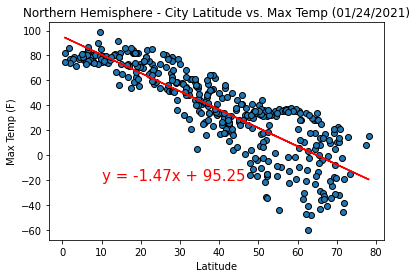

In [82]:
x_values = northern_hem_data["Lat"]
y_values = northern_hem_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Northern Hemisphere - City Latitude vs. Max Temp ({today_date})")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/nor_lat_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3182582048713159


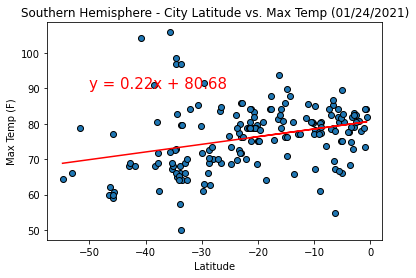

In [75]:
x_values = southern_hem_data["Lat"]
y_values = southern_hem_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Southern Hemisphere - City Latitude vs. Max Temp ({today_date})")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/sou_lat_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.32642090718883227


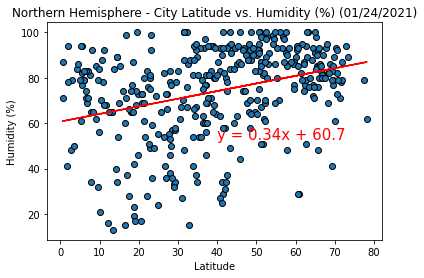

In [76]:
x_values = northern_hem_data["Lat"]
y_values = northern_hem_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,53),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - City Latitude vs. Humidity (%) ({today_date})")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/nor_lat_hum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.40491804894616296


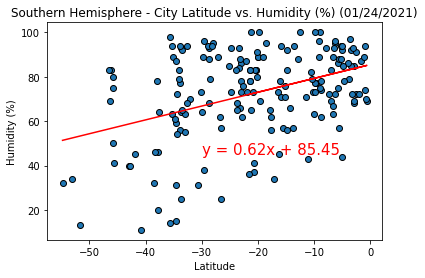

In [77]:
x_values = southern_hem_data["Lat"]
y_values = southern_hem_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - City Latitude vs. Humidity (%) ({today_date})")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/sou_lat_hum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18848944419320976


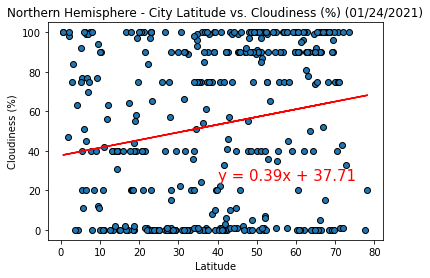

In [78]:
x_values = northern_hem_data["Lat"]
y_values = northern_hem_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - City Latitude vs. Cloudiness (%) ({today_date})")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/nor_lat_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4114273400779703


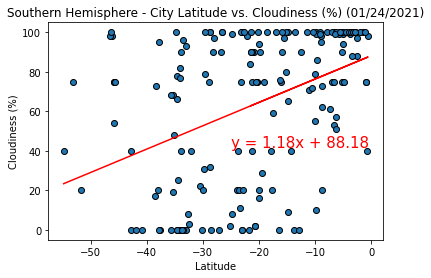

In [79]:
x_values = southern_hem_data["Lat"]
y_values = southern_hem_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,42),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - City Latitude vs. Cloudiness (%) ({today_date})")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/sou_lat_cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04034864227437588


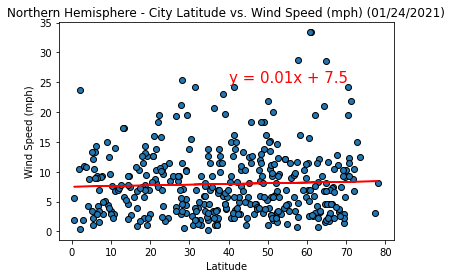

In [80]:
x_values = northern_hem_data["Lat"]
y_values = northern_hem_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - City Latitude vs. Wind Speed (mph) ({today_date})")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/nor_lat_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.35465411153535176


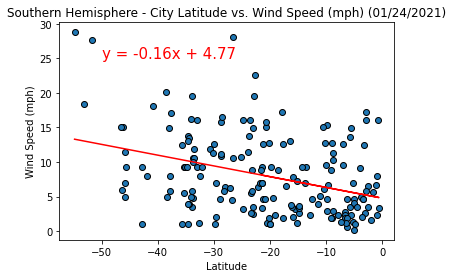

In [81]:
x_values = southern_hem_data["Lat"]
y_values = southern_hem_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - City Latitude vs. Wind Speed (mph) ({today_date})")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/sou_lat_wind.png")
plt.show()